# Introduction
## Motivation and problem statement

I want to analyze the temperatures and demographics of big cities to see if there is evidence of the urban heat island (UHI) effect. I'm doing a research project on UHIs for another class so I thought this would be a good opportunity to conduct my own research. The UHI effect occurs when urbanized areas experience higher temperatures than surrounding rural areas. Structures such as buildings, roads, and other infrastructure absorb and re-emit the sun’s heat more than natural landscapes such as forests and water bodies. This [NPR article](https://www.npr.org/2019/09/03/754044732/as-rising-heat-bakes-u-s-cities-the-poor-often-feel-it-most) shows that poorer cities are more vulnerable to heat. 

From a scientific and practical perspective, UHI is a relevant topic, especially with climate change. There's no doubt that our planet is warming so it'll be interesting to see the magnitude of temperature changes in different areas. From a human-centered perspective, many people living in cities are already facing the effects of extreme heat. Heat equity is an issue that needs to be addressed because certain communities that are poorer or are composed of a certain demographic (ie age, ethnicity) do not have the same access to healthcare or cooling centers. These people are at higher risk for health issues. This issue is related to human-centered design because it affects our comfort and homes. Understanding who is affected will help policymakers better design cities and allocate resources to maximize the benefits. 

While the NPR article analyzed the temperatures of cities, the dataset I'm using (more info about the data below) contains the UHI effect for different Census tracts in the US. The UHI effect is calculated by finding the difference between the temperatures within cities and outside of them. I want to learn more about which areas experience the highest UHI effect. I hope to apply the technical data analysis skills I've learned this quarter. Finally, I want to explore the correlation between the demographics of cities and UHI effect to see if I can come up with my own conclusion about who is most vulnerable. 

## Data selected for analysis

I will use [this dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/1F72FB) from a [research paper](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021EF002016) published on the American Geophysical Union about UHI. It is under the CC0 1.0 Universal  (CC0 1.0) Public Domain license so I can use it freely without needing permission. The data was extracted from the US Census Bureau 2014 5-year American Community Survey (ACS) for all census tracks in the contiguous US. It includes 1,056 counties that have at least 10 built-up census tracts. This sample includes both large cities and small towns, and covers more than 300 million people. Each row is a Census tract (a geographical region used for Census purposes, it's more granular than the county level) with different demographic data and measurements. 

Some of the fields in the data set are:
- Census tract number 
- Day and night time temperature differences
- Share of White, Black, Asian, and Hispanics
- nonUS: share of individuals that are NOT US-citizens
- Education: share of individuals with a high school diploma (includes High school equivalency) or less. 
- Age: share of individuals 75 years of age or older
- Income: median income in the past 12 months in 2014 inflation-adjusted US$

This dataset will help my research because I can choose specific cities to focus on and I already have the demographic data so I can see if there's a correlation between temperature and other factors. The data table doesn't have any missing data making analysis easier later on. For more detail about the fields in the data set, click [here](https://agupubs.onlinelibrary.wiley.com/action/downloadSupplementdoi=10.1029/2021EF002016&file=2021EF002016-sup-0001-Supporting%20Information%20SI-S01.pdf).

One ethical consideration is that American Indians are not a race represented in the dataset. This might not have been collected in the Census ACS so this research is not inclusive of all communities. Other than that, the data is public and there's no personally identifiable information so privacy shouldn't be a huge concern.

## Unknowns and dependencies

I'm not sure which cities to focus on yet or how many I should analyze. Going forward, I will need to identify an appropriate scope since there is a lot of data and I don't want to take on too much. I'm not sure if I need to clean up any of the data or if it's ready to be analyzed. I'm not too confident in my data analysis skills or statistics so I might have to spend more time trying to figure out how to code things.

## Research Questions

In this project, I want to determine what populations and regions are exposed to the highest UHI effect. By identifying who is being impacted, we can design better heat mitigation strategies. Below are questions to guide my research that extend beyond the current research that I have read about.  

1. Which counties have the largest daytime temperature difference? Do these counties have the largest nighttime temperature difference?
2. What is the correlation between the daytime UHI effect and demographic factors like income, age, and race?

Based on feedback I got from peers, I have narrowed my scope to focus on the top counties that have the highest UHI effect and will analyze the correlation for only the top 5 counties. 

## Background

The urban heat island effect is a well-documented phenomenon. There are quite a few studies on the correlation between income and heat. For example, [this NPR article](https://www.npr.org/2019/09/03/754044732/as-rising-heat-bakes-u-s-cities-the-poor-often-feel-it-most) identified 9 cities with the strongest correlations between heat and income. NPR's methodology analyzed 97 of the most populous U.S. cities using the median household income from U.S. Census Bureau data and thermal satellite images from NASA and the U.S. Geological Survey. In this project, I want to explore income vs UHI effect and see if that's different from the temperature.

In the study I got the dataset from, the author found that neighborhoods with lower income and higher shares of non-white residents experience significantly more extreme surface urban heat than their wealthier, whiter counterparts. I wanted to compare the correlation strengths between other variables in the dataset like Age and Race and see if there's one factor that stands out. 

## Methodology
Before starting my analysis, I will make sure my dataset doesn't have missing data and do data cleaning if necessary.

For RQ1, I will first find the top 100 most populous counties and then calculate the median daytime UHI effect. I will choose the top 5 counties to analyze. Since the UHI effect happens in cities, I wanted to only focus on counties that have a lot of urban areas since that would contribute a lot to the UHI effect. To present this data, I will create maps to show the daytime and nighttime temperature for each of the 5 counties on the Census Tract level. A map is a helpful way to display geographic data.

For RQ2, I will create a correlation matrix using the data from all 5 counties to compare the UHI effect, income, and each race that was included in my dataset (Black, Asian, White, Hispanic, and Age). Then I will analyze each county individually to see the correlation for 3 visualizations for each factor. I will create a scatterplot comparing UHI effect and each of the variables. I will calculate the correlation coefficient for each of the variables to see which has the strongest relationship. These graphs are the most appropriate way to convey this information because the viewer will be able to see if there are any outliers and how strongly correlated the data points are. 

# Analysis & Findings
## Preparing the data
Before I can start answering my research questions, I need to prepare my data. The original dataset had a lot of columns that I wasn't interested in exploring, removing these will make it easier to work with my data. In the code below, I create a dataframe from my dataset using the pandas library. I drop the extraneous columns. 


In [ ]:
# import pandas module 
import pandas as pd 
    
# making dataframe 
df = pd.read_csv("data.csv") 

# delete unecessary columns
print(df.columns)
df = df.drop(['night2010', 'night2020','day2010', 'day2020', 'BSA','BSA2010','BSA2020', 'NDBI', 'NDBI2010', 'NDBI2020', 'NDVI', 'NDVI2010', 'NDVI2020', 'Pop2010', 'Pop2020', 'Black2010', 'Black2020', 'Asian2010', 'Asian2020', 'Hispanic2010', 'Hispanic2020'], axis=1)
print(df.columns)

Below, I print one row of data to see what I'm working with. I notice that the 'NAME' column contains the Census Tract number as well as the county and state. This is redundant because there's already a 'County' and 'State' field. I want to only the keep the Census Tract number so I split this column and remove the redundant fields. I also rearrange the order of the fields for readability. 

In [ ]:
# print one row of data
print(df.loc[0])

# Split the 'NAME' column, we only want to keep the census tract number
df[['Tract', 'County1', 'Full_State']] = df['NAME'].str.split(',', expand=True)
df = df.drop(['NAME','County1','Full_State'], axis=1)

#rearrange column order
cols = ['County', 'Tract', 'Area', 'GEOID', 'day', 'night', 'DevelopedArea', 'Pop', 'State',
       'Black', 'Asian', 'White', 'Hispanic', 'nonUS', 'Edu', 'SP', 'Age',
       'Income', 'Housing']
df = df[cols]

Below is an example row of what my data looks like after cleaning. 

In [ ]:
#print single row
print(df.loc[0])

## RQ1
**Which counties have the largest daytime temperature difference? Do these counties have the largest nighttime temperature difference?**

Since UHI happens in urban areas. I wanted to narrow down my dataset to just the 100 most populous counties in the US. Then within that set, I want to see which counties had the greatest UHI effect. 

In the cell below, I break down my original dataframe and just look at the population by county. I create a new dataframe with just the population and county columns. I group by the 'County' field to organize the Census Tracts. This new dataframe contains only the top 100 largest counties. 

In [ ]:
#Finding the top 100 most populous counties
df_topcounties = df[['Pop','County']] #create a dataframe with just population and county columns
df_topcounties = df.groupby('County').sum() #group each row (a census tract) by the county it belongs to
df_topcounties = df_topcounties['Pop'].nlargest(n=100) #get the top 100 largest counties
print(df_topcounties)

Now that I have the most populous counties, I merge that dataframe with the original dataframe that contains all data based on the County column. This new dataframe df_highest_temp has all the data by Census Tract in each of the top 100 largest counties. Then I find the median day time temperature difference (contained in the 'day' column) for each county. I chose to calculate the median instead of mean because medians are less likely to be skewed by outliers. Again, the 'day' coluumn represents the difference between the difference in temperature measured in the census tract and rural temperatures. It shows how much hotter urban areas are compared to rural areas. I follow the same process to calculate the median UHI effect during the nighttime. 

In [ ]:
# Find the median daytime temp difference for the 100 most populous counties
# merge df_topcounties with original df based on 'County'
df_highest_temp = df.merge(df_topcounties, on='County') 

# Calculate median daytime UHI effect for each county
highest_day = df_highest_temp.groupby('County')['day'].aggregate('median').reset_index() 

# Calculate median nighttime UHI effect for each county
highest_night = df_highest_temp.groupby('County')['night'].aggregate('median').reset_index() 

# Adjust display settings to show all 100 counties
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# Show top 10 hottest counties sorted by greatest temp difference
print(highest_day.sort_values('day', ascending=False).head(10))
print(highest_night.sort_values('night', ascending=False).head(10))

### Answering RQ1
Based on the output above, I can answer RQ1. **Philadelphia County Pennsylvania, Providence County Rhode Island, Suffolk County Massachusetts, Essex County New Jersey, Bergen County New Jersey are the top 5 counties that experience the greatest UHI effect during the day. These are not exactly the same counties that have the highest effect at night.** Essex and Bergen County in New Jersey are also among the top 5 counties that have the highest UHI effect during nighttime.

### Creating Visualizations in Tableau
I want to make a map of the counties to visualize the UHI effect in the top 5 counties. I want to show the daytime and nighttime UHI effect to compare. In the code below, I create a list of the names of the the top 5 counties. Then I filter my main dataframe to get the counties in my list so I can create a csv. Then I can import the csv into Tableau and create a map. 

In [ ]:
# create a list to store the names of the top 5 counties
top5_day = ['Philadelphia County Pennsylvania', 'Providence County Rhode Island', 'Suffolk County Massachusetts', 'Essex County New Jersey', 
            'Bergen County New Jersey']

# Filter main df to get just the top 5 counties
top5_df = df[df['County'].isin(top5_day)]

#create csv
top5_df.to_csv('top5.csv')

In Tableau, my data sources are the csv generated above that contains census tract level data and ShapeFiles that I downloaded from the [US Census Bureau] (https://www.census.gov/cgi-bin/geo/shapefiles/index.php). The ShapeFiles will outline each of the cesnsus tracts when I create the maps. Each Census Tract has a GEOID field that I join with the GEOID field in the ShapeFiles. I created 4 worksheets for the counties - since Bergen and Essex county are both in NJ, I combined them in the same sheet. I display the daytime temperatures and use color to represent hot and cool areas. I followed the same procedure to produce the nighttime maps. Finally, I display all 8 sheets in a dashboard for easy comparison (see screenshot below).
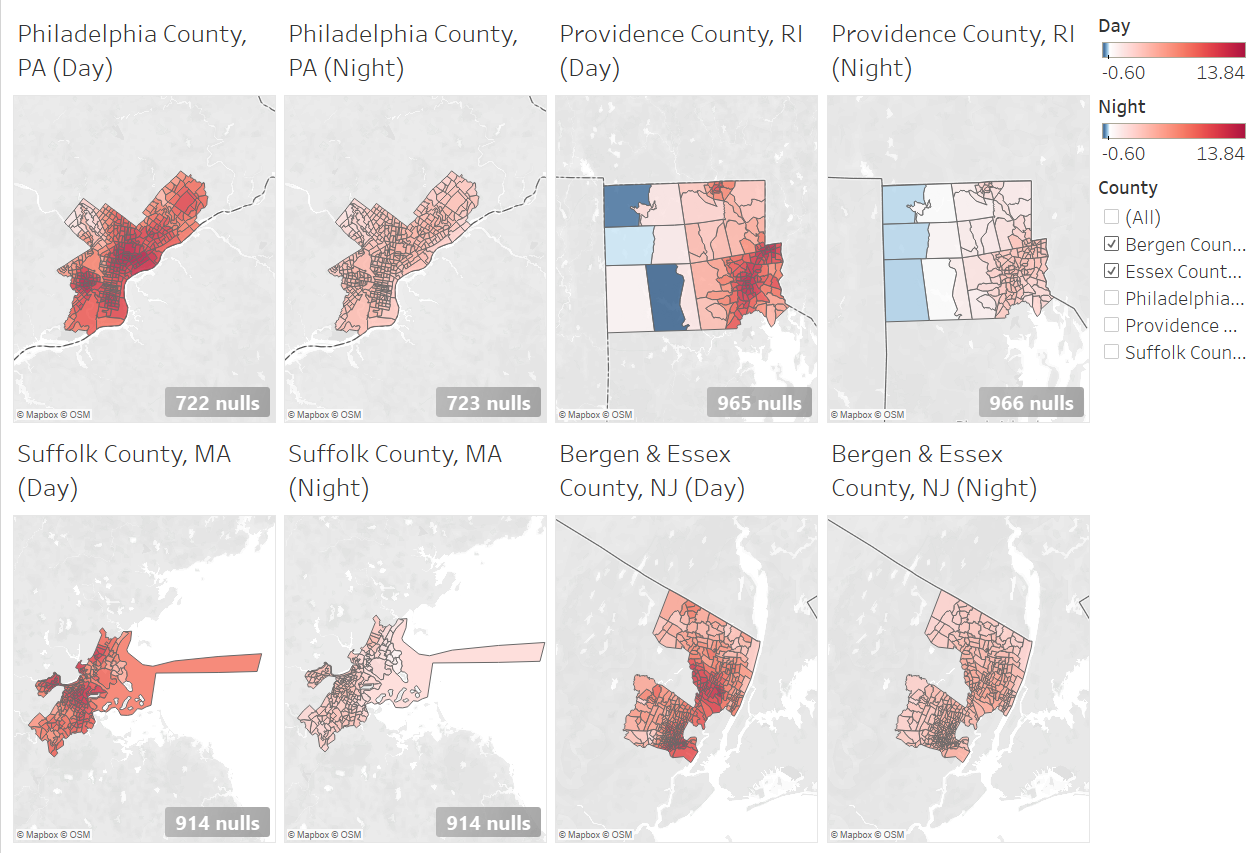

## RQ 2
**What is the correlation between UHI effect and demographic factors like income, age, and race?**

### Answering RQ 2
To answer this question, I will compare these factors across all the Census Tracts in the 5 counties. Below, I use the seaborn library to create a correlation heatmap. It shows the correlation coefficient between the variables. The row/column with labeled 'day' is what I'm most interested in. Here are the definitions of each of the fields I'm exploring:

- day: daytime UHI effect
- Income: median income in the past 12 month in 2014 inflation-adjusted US$. 
- Black: share of individuals identifying as Black or African Americans alone or in combination with one or more other races. 
- Asian: share of individuals identifying as Asian and no other race.
- White: share of individuals identifying as White but not ethnically Hispanic or Latinx. 
- Hispanic: share of individuals identifying as ethnically Hispanic or Latinx. 
- Age: share of individuals 75 years of age or older. 

It seems that Income has the strongest correlation to daytime UHI effect out of all the variables although would still be considered a weak negative one. Race (White) and Age also have weak negative correlation with UHI effect. Race (Black) and (Hispanic) have a weak positive correlation. Race (Asian) has no correlation.

In [ ]:
import seaborn as sns

corr_df = top5_df[["day", "Income", "Black", "Asian", "White", "Hispanic", "Age"]]
sns.heatmap(corr_df.corr(), cmap="PiYG", annot=True);

### Temp vs Income
The heatmap above gave me a good idea of the correlatioin across all 5 counties. However, I wanted to look on a county by county basis to see if what the correlations were. To find the correlation between temperature and income I will make a scatterplot for each county. Below, I calculate the correlation between the 'day' and 'Income' column. I use the seaborn library to make the plot. I use a for loop to create a plot and calculate the correlation coefficient for each of the 5 counties. I'm creating a list to store the correlation coefficients for each county. I repeat this process for the rest of the demographic variables. I plan on creating a dataframe from the lists of coefficients for each variable by county. Then I can use the dataframe and import it into Tableau to create a visualization. 

In [ ]:
# Create list to store correlation coefficients
income_corr = []

# for each county, calculate the corr coefficient and make a scatterplot
for county in top5_day:
    county_df = df[df['County'] == county] 
    plot = sns.lmplot(x='Income',y='day',data=county_df,fit_reg=True) 
    plot.fig.suptitle(county, fontsize=18)    
    corr_coefficient = county_df['Income'].corr(county_df['day'])
    income_corr.append(corr_coefficient)
    print(corr_coefficient)
    print(plot)

### Temp vs Race (Black)

Below, I repeat the process for temperature and Race (Black)

In [ ]:
# Create list to store correlation coefficients
black_corr = []

# for each county, calculate the corr coefficient and make a scatterplot
for county in top5_day:
    county_df = df[df['County'] == county] 
    plot = sns.lmplot(x='Black',y='day',data=county_df,fit_reg=True) 
    plot.fig.suptitle(county, fontsize=18) 
    corr_coefficient = county_df['Black'].corr(county_df['day'])
    black_corr.append(corr_coefficient)
    print(corr_coefficient)
    print(plot)

### Temp vs Race (Asian)

Below, I repeat the process for temperature and Race (Asian)

In [ ]:
# Create list to store correlation coefficients
asian_corr = []

# for each county, calculate the corr coefficient and make a scatterplot
for county in top5_day:
    county_df = df[df['County'] == county] 
    plot = sns.lmplot(x='Asian',y='day',data=county_df,fit_reg=True) 
    plot.fig.suptitle(county, fontsize=18) 
    corr_coefficient = county_df['Asian'].corr(county_df['day'])
    asian_corr.append(corr_coefficient)
    print(corr_coefficient)
    print(plot)

### Temp vs Race (White)

Below, I repeat the process for temperature and Race (White)

In [ ]:
# Create list to store correlation coefficients
white_corr = []

# for each county, calculate the corr coefficient and make a scatterplot
for county in top5_day:
    county_df = df[df['County'] == county] 
    plot = sns.lmplot(x='White',y='day',data=county_df,fit_reg=True) 
    plot.fig.suptitle(county, fontsize=18) 
    corr_coefficient = county_df['White'].corr(county_df['day'])
    white_corr.append(corr_coefficient)
    print(corr_coefficient)
    print(plot)

### Temp vs Race (Hispanic)

Below, I repeat the process for temperature and Race (Hispanic)

In [ ]:
# Create list to store correlation coefficients
hispanic_corr = []

# for each county, calculate the corr coefficient and make a scatterplot
for county in top5_day:
    county_df = df[df['County'] == county] 
    plot = sns.lmplot(x='Hispanic',y='day',data=county_df,fit_reg=True) 
    plot.fig.suptitle(county, fontsize=18) 
    corr_coefficient = county_df['Hispanic'].corr(county_df['day'])
    hispanic_corr.append(corr_coefficient)
    print(corr_coefficient)
    print(plot)

### Temp vs Age

Below, I repeat the previous steps but for the temperature and age factors.

In [ ]:
# Create list to store correlation coefficients
age_corr = []

# for each county, calculate the corr coefficient and make a scatterplot
for county in top5_day:
    county_df = df[df['County'] == county] 
    plot = sns.lmplot(x='Age',y='day',data=county_df,fit_reg=True) 
    plot.fig.suptitle(county, fontsize=18) 
    corr_coefficient = county_df['Age'].corr(county_df['day'])
    age_corr.append(corr_coefficient)
    print(corr_coefficient)
    print(plot)

### Creating Heatmap in Tableau

Below, I create input all the lists from above into a dictionary. I turn the dictionary into a dataframe, then into a csv file. I import the csv file into Tableau and created a correlation heatmap (see screenshot below). It shows the correlation between temperature and various demographic factors for each county. Here are the results based on the visualization:

- Age has a weak negative correlation across all counties. 
- Income has the strongest correlation in Essex County. 
- Asian has both positive and negative correlation. 
- Black and Hispanic have mostly negative correlations with varying degrees of strength. 
- White is moderate to strong positive correlation across all counties.

In [ ]:
d = {'County': top5_day,'Temp v Income': income_corr, 'Race (Black)': black_corr, 'Race (Asian)': asian_corr, 'Race (White)': white_corr, 
     'Race (Hispanic)': hispanic_corr, 'Age': age_corr}

corr_df1 = pd.DataFrame(d)
corr_df1.to_csv('correlation_table.csv')

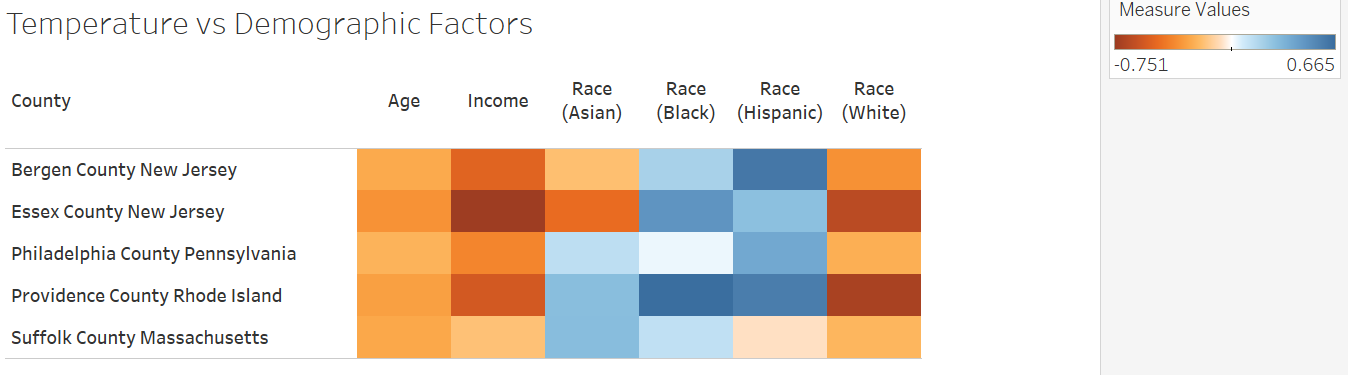

# Discussion

My RQ 1 was: *Which counties have the largest daytime temperature difference? Do these counties have the largest nighttime temperature difference?* Through my analysis, I found the top 5 counties with the greatest median daytime UHI effect. They were:

 1. Philadelphia County Pennsylvania: 10.2 F
 2. Providence County Rhode Island:  9.8 F
 3. Suffolk County Massachusetts: 9.3 F
 4. Essex County New Jersey: 8.8 F
 5. Bergen County New Jersey: 7.7 F

However, these counties do not quite have the largest nighttime temperature difference - only Essex and Bergen County were in the top 5 for nighttime. This has implications for the kinds of heat mitigation strategies that are implemented. For example, installing reflective roofs would be useful for places that are hotter during the day but the roofs are not as effective at night when there is no sunlight to reflect. Additionally, by creating the map visualizations, one can detect the areas that suffer the most from the UHI effect. It's interesting to note that the NPR article cited in the introduction focused on the temperature and not the UHI effect. One extension of this project would be comparing the two ways of measuring heat (i.e. "Do the hottest places also have the highest UHI effect?"). 

My RQ2 was: *What is the correlation between UHI effect and demographic factors like income, age, and race?* In my analysis, I calculated the correlation coefficients across the 5 counties as well as by county. I discovered that income was the had the strongest correlation out of all the demographic variables. One reason for this (based on the research I've done in my other class) is that lower income communities live in denser buildings which creates more heat from cooling or heating. This has implications for where we focus applying heat mitigation strategies to ensure an equitable approach. 

## Limitations
I only focused on analyzing 5 counties in this project. Since my sample size is very small, my findings may not be significant and generalizable to all areas in the US. Another limitation was that I analyzed my dataset based on county rather than city because I didn't have access to data linking Census Tracts to city boundaries. If I aggregated my data based on city, I might get different answers to RQ 1 since the median UHI could change based on which tracts belonged within the city limits. Similarly, the different grouping of tracts would yield different correlation coefficients. 

# Conclusion
The purpose of this project was the quantitatively identify the areas that experiences the greatest UHI effect which was not explicitly addressed in the study that the dataset came from and to compare the correlations between temperature and demographic variables. I was able to find the top 5 counties that suffered the greatest UHI effect. These counties were on the East Coast. It would be interesting to see if there is a correlation between geographic region and UHI effect. Within those counties, I determined the demographic factor with the strongest correlation to temperature was Income. Overall, in this project, I did a lot of quantitative analysis on who is being impacted but ultimately addressing the UHI problem requires more research on the scientific and physical process that are contributing to warming cities. However, I do think that my findings would be useful for deciding where government should allocate resources to combating heat.